In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.plotly as py
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('data.csv',encoding = "ISO-8859-1")
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
replacements = {
   'state': {
      r'Uttaranchal': 'Uttarakhand', 
   }
}

data.replace(replacements, regex=True, inplace=True)

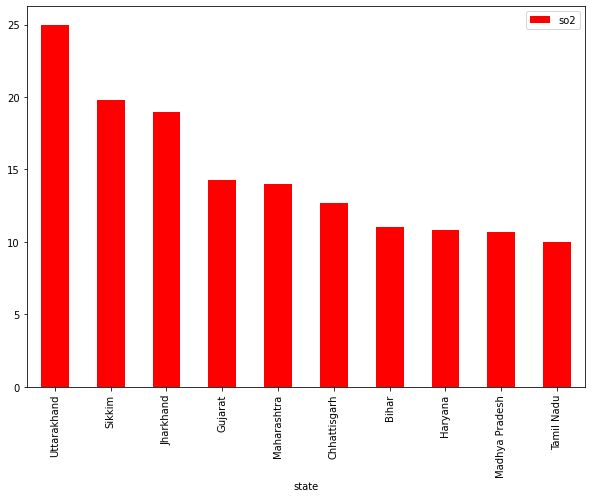

In [ ]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).head(10).plot.bar(color='r')
plt.show()

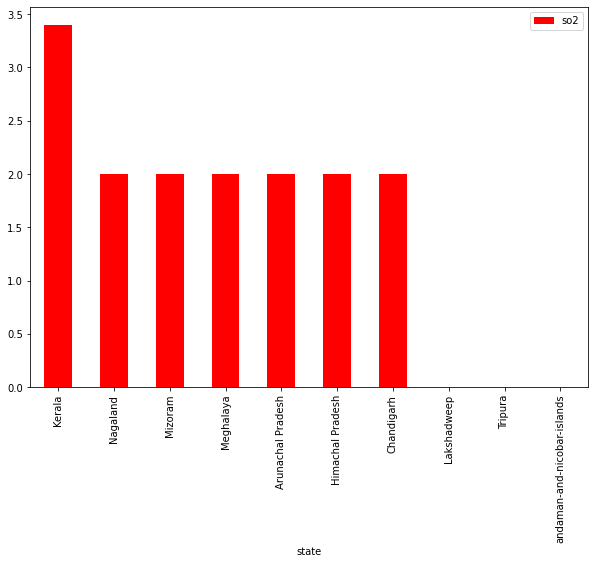

In [ ]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).tail(10).plot.bar(color='r')
plt.show()

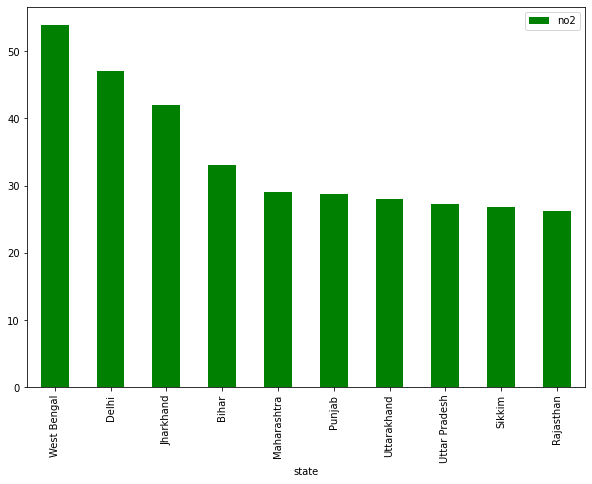

In [ ]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).head(10).plot.bar(color='g')
plt.show()

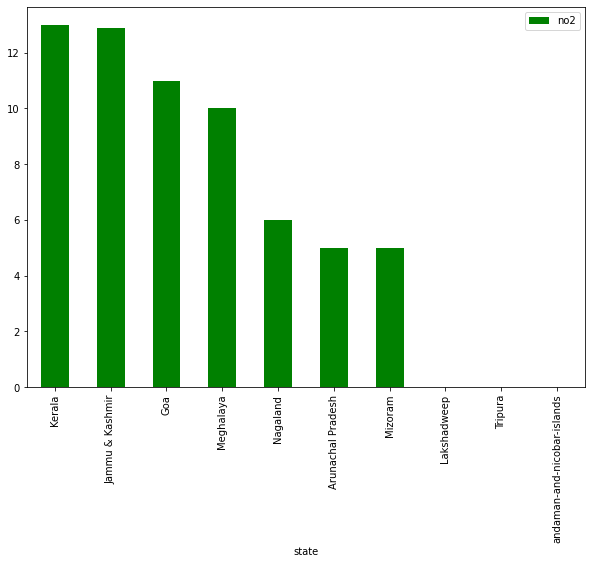

In [ ]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).tail(10).plot.bar(color='g')
plt.show()

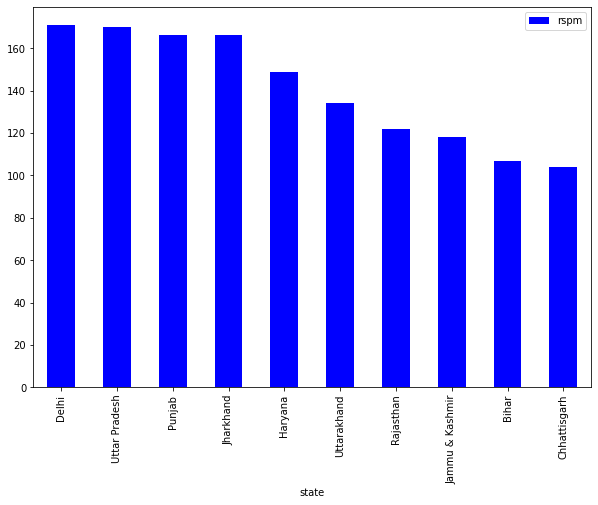

In [ ]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).head(10).plot.bar(color='b')
plt.show()

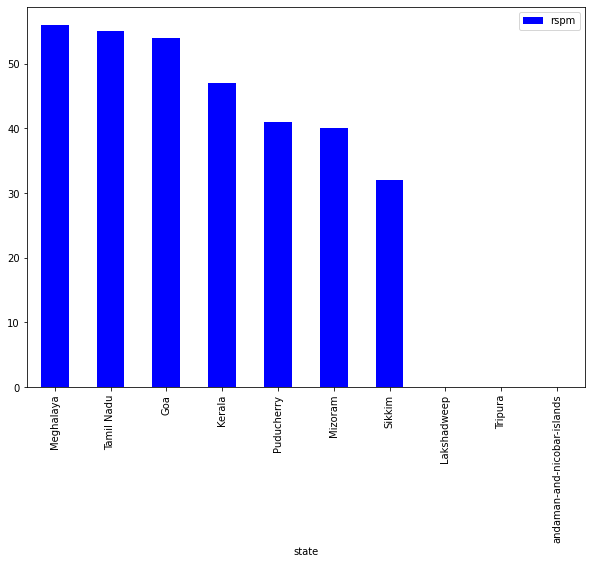

In [ ]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).tail(10).plot.bar(color='b')
plt.show()

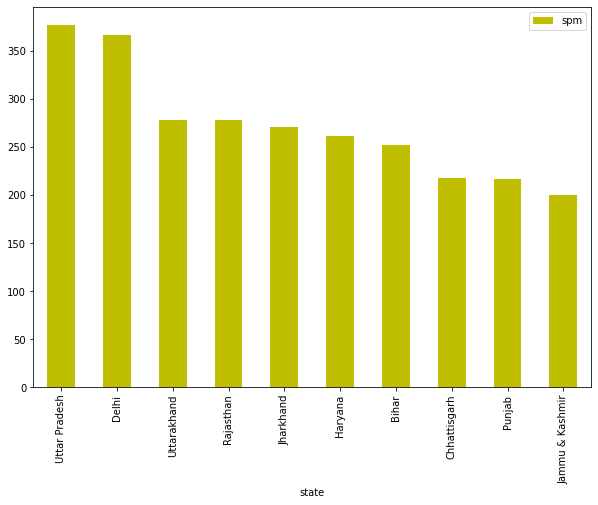

In [ ]:
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).head(10).plot.bar(color='y')
plt.show()

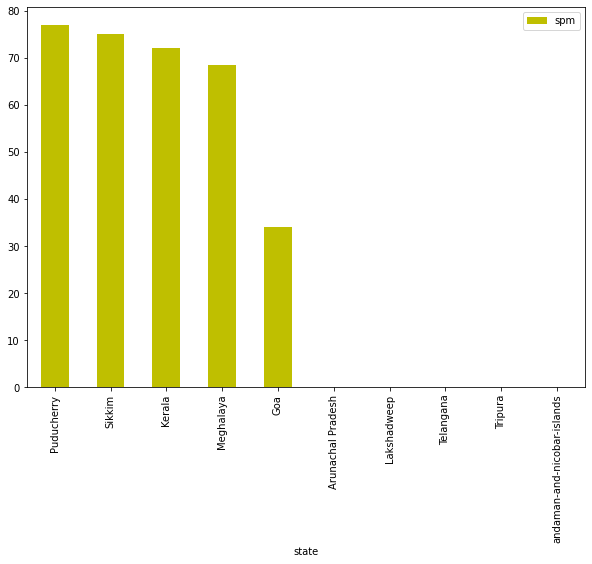

In [ ]:
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).tail(10).plot.bar(color='y')
plt.show()

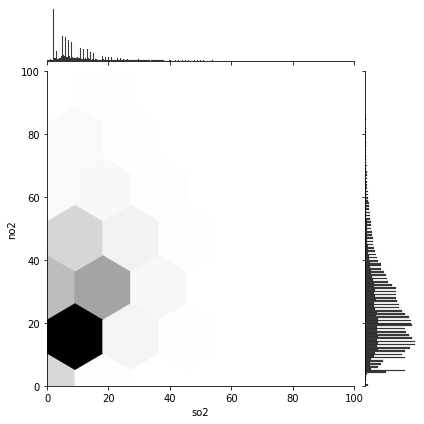

In [ ]:
#Exploring relationship between proportion of Sulphur dioxide & Nitrogen dioxide
#sns.lmplot(x='so2',y='no2',data=data)
sns.jointplot(x='so2', y='no2', data=data,kind='hex',color='k',xlim={0,100}, ylim={0,100})

In [ ]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

<AxesSubplot:xlabel='year', ylabel='so2'>

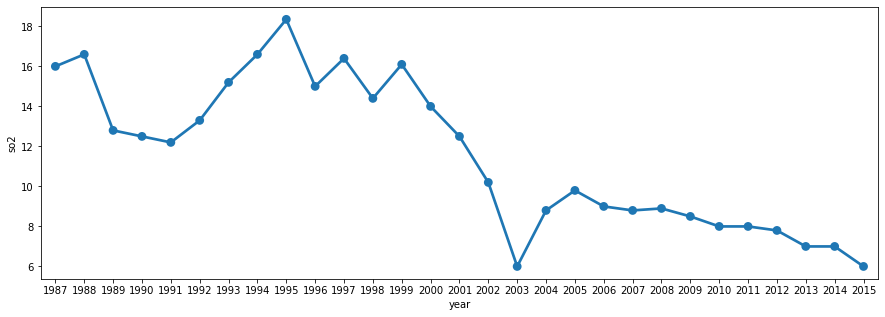

In [ ]:
df = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='so2', data=df)

<AxesSubplot:title={'center':'so2 by state and year'}, xlabel='year', ylabel='state'>

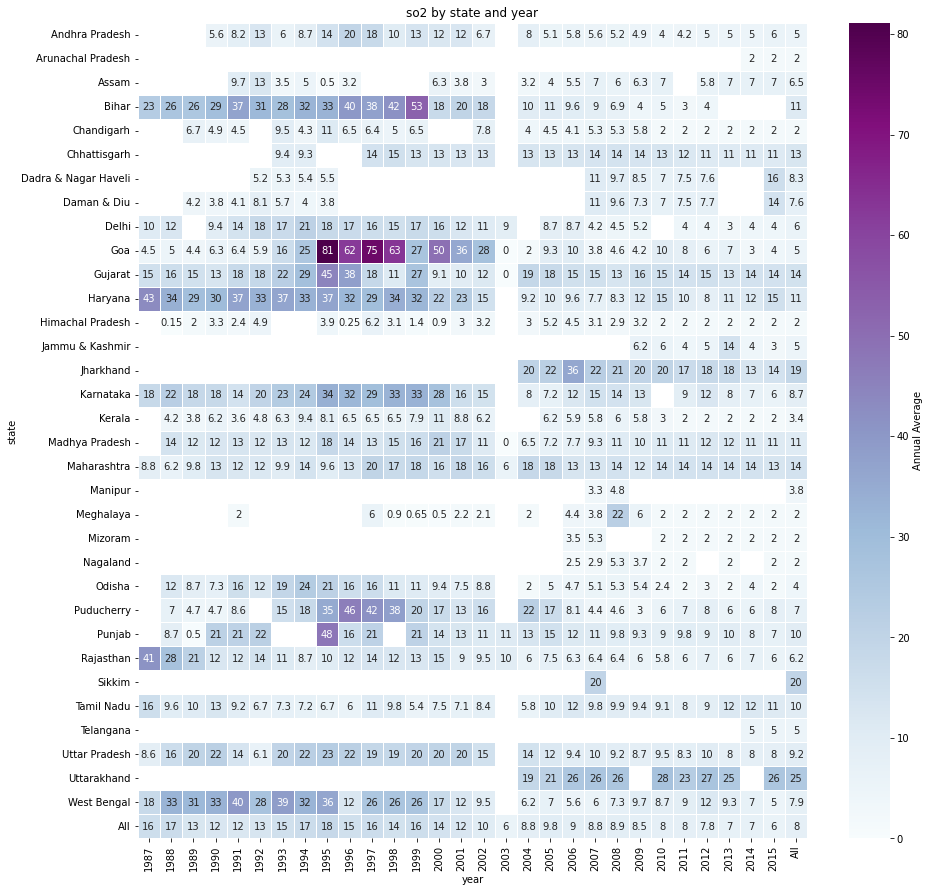

In [ ]:
#Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(data.pivot_table('so2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

<AxesSubplot:xlabel='year', ylabel='no2'>

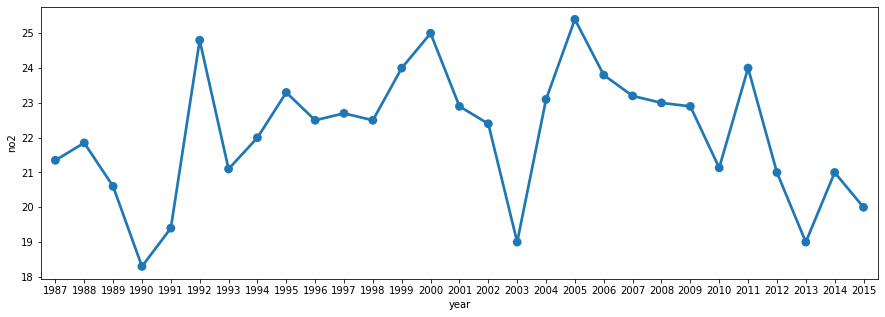

In [ ]:
df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='no2', data=df)

<AxesSubplot:title={'center':'no2 by state and year'}, xlabel='year', ylabel='state'>

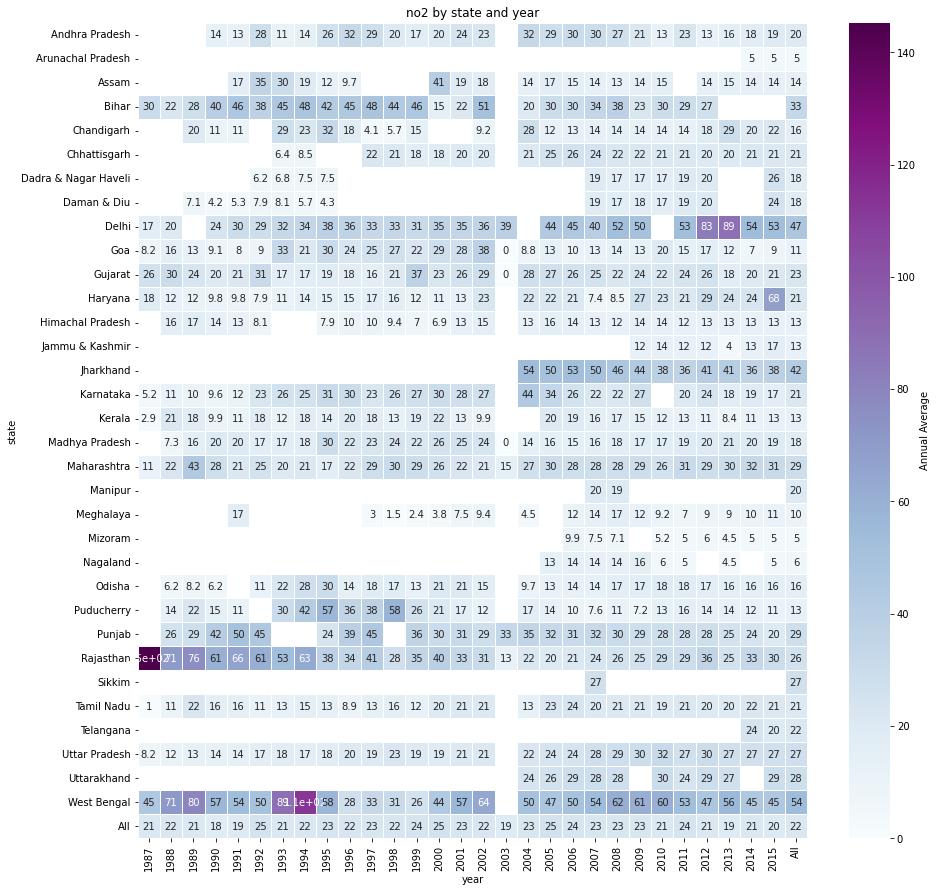

In [ ]:
#Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(data.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})